### Note book to use Histogram-Based Gradient Boosting and Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set()

from pprint import pprint

from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score


pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

import warnings
warnings.filterwarnings("ignore")

np.random.seed(5)

In [2]:
trainset = pd.read_csv('traincleaned.csv')
testset = pd.read_csv('testcleaned.csv')

In [3]:
trainset.shape

(1562, 9)

In [4]:
trainset.head()

,population,poverty_rate,pct_asian,pct_adults_bachelors_or_higher,death_rate_per_1k,pct_adult_obesity,pct_adults_with_high_school_diploma,pct_physical_inactivity,gross_rent
0,0.023278,0.163225,0.215669,0.415881,0.453269,0.515625,0.452178,0.733696,577.0
1,0.064244,0.301803,0.057134,1.000000,0.000000,0.218750,0.120183,0.030797,844.0
2,0.172656,0.382985,0.180185,0.477163,0.530341,0.442708,0.608543,0.429348,700.0
3,0.054635,0.537368,0.164462,0.464484,0.530151,0.229167,0.401060,0.487319,592.0
4,0.022019,0.321482,0.521310,0.414058,0.795009,0.588542,0.542461,0.726449,444.0


In [5]:
trainset.describe()

,population,poverty_rate,pct_asian,pct_adults_bachelors_or_higher,death_rate_per_1k,pct_adult_obesity,pct_adults_with_high_school_diploma,pct_physical_inactivity,gross_rent
count,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,0.315221,0.470485,0.325477,0.420082,0.498212,0.489837,0.501116,0.498382,690.869398
std,0.337841,0.206988,0.322053,0.244388,0.187483,0.213047,0.185760,0.190813,161.102958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,351.000000
25%,0.065720,0.312640,0.091503,0.239495,0.375000,0.375000,0.379902,0.375000,578.000000
50%,0.161420,0.437152,0.202047,0.362974,0.497575,0.494792,0.516032,0.512681,650.000000
75%,0.439432,0.587584,0.454902,0.543697,0.625000,0.625000,0.633171,0.625000,773.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1067.375000


In [6]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 9 columns):
population                             1562 non-null float64
poverty_rate                           1562 non-null float64
pct_asian                              1562 non-null float64
pct_adults_bachelors_or_higher         1562 non-null float64
death_rate_per_1k                      1562 non-null float64
pct_adult_obesity                      1562 non-null float64
pct_adults_with_high_school_diploma    1562 non-null float64
pct_physical_inactivity                1562 non-null float64
gross_rent                             1562 non-null float64
dtypes: float64(9)
memory usage: 110.0 KB


In [7]:
X = trainset.iloc[:,0:8]
y = trainset.iloc[:,8]

In [8]:
X.shape, y.shape

((1562, 8), (1562,))

In [9]:
X.values,y.values

(array([[0.02327763, 0.16322538, 0.21566878, ..., 0.515625  , 0.45217786,
         0.73369565],
        [0.0642442 , 0.30180264, 0.05713445, ..., 0.21875   , 0.12018315,
         0.0307971 ],
        [0.17265588, 0.38298497, 0.18018524, ..., 0.44270833, 0.60854312,
         0.42934783],
        ...,
        [0.49662605, 0.24624654, 0.48104352, ..., 0.25520833, 0.40752587,
         0.57427536],
        [0.02858238, 0.67684543, 0.        , ..., 0.125     , 0.52084593,
         0.38586957],
        [1.        , 0.32641164, 1.        , ..., 0.02604167, 0.13702451,
         0.125     ]]), array([577., 844., 700., ..., 754., 640., 976.]))

### Perform TTS

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [11]:
X_train.shape, y_train.shape

((1249, 8), (1249,))

In [12]:
X_test.shape, y_test.shape

((313, 8), (313,))

### Histogram Boosting Test Model

In [13]:
hist = HistGradientBoostingRegressor(scoring='r2')

In [14]:
histFit = hist.fit(X_train,y_train)

In [15]:
y_predict = histFit.predict(X_test)

In [16]:
y_predict[0:5]

array([503.48612249, 779.43061766, 605.45060374, 828.03357439,
       789.78141774])

Text(0, 0.5, 'Predictions')

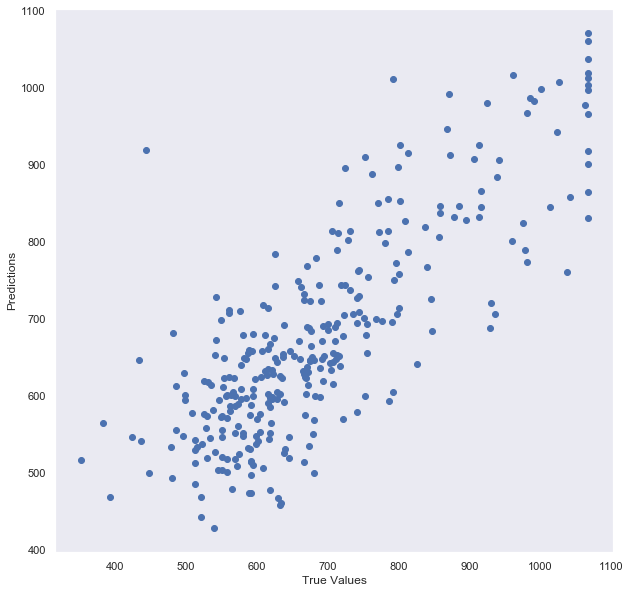

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_predict)
plt.grid()
plt.xlabel('True Values')
plt.ylabel('Predictions')

### Model Evaluation

In [18]:
histFit.score(X_test,y_test)  #Returns R2 score

0.6430739694081228

### Perform Cross-Validation

Cross-validation is another method to estimate the skill of a method on unseen data. Like using a train-test split.

Cross-validation systematically creates and evaluates multiple models on multiple subsets of the dataset.

This, in turn, provides a population of performance measures.

- We can calculate the mean of these measures to get an idea of how well the procedure performs on average.
- We can calculate the standard deviation of these measures to get an idea of how much the skill of the procedure is expected to vary in practice.

The train-test split and k-fold cross validation are called resampling methods. Resampling methods are statistical procedures for sampling a dataset and estimating an unknown quantity.

In the case of applied machine learning, we are interested in estimating the skill of a machine learning procedure on unseen data. More specifically, the skill of the predictions made by a machine learning procedure.

Once we have the estimated skill, we are finished with the resampling method.

- If you are using a train-test split, that means you can discard the split datasets and the trained model.
- If you are using k-fold cross-validation, that means you can throw away all of the trained models.

They have served their purpose and are no longer needed.

You are now ready to finalize your model.

When choosing a value for k each fold(group) should be large enough to be **representative** of the model (commonly k=10 or k=5) and small enough to be computed in a reasonable amount of time. Depending on the dataset size, different k values can sometimes be experimented with. As a general rule, as k increases, bias decreases and variance increases.

But the purpose of cross-validation is not to come up with our final model. We don't use these 5 instances of our trained model to do any real prediction. For that we want to use all the data we have to come up with the best model possible. The purpose of cross-validation is model checking, not model building.

In [19]:
r2score = cross_val_score(histFit,X,y,cv=5,n_jobs=-1,scoring='r2')

In [20]:
r2score

array([0.66156482, 0.68166685, 0.70099384, 0.68505614, 0.67964167])

In [21]:
r2score.mean()

0.6817846635513705

In [22]:
r2score.std()

0.012594789001634512

### Using RandomGridSearch to tune hyperparameters

In [ ]:
grad = GradientBoostingRegressor(loss='ls',learning_rate=0.1,n_estimators=100,random_state=5)

In [ ]:
params = {'subsample': [0.5,0.75,1.0],
          'min_samples_split':[2,3,4,5],
          'min_samples_leaf':[1,2,3,4]
        
         }

pprint(params)

In [ ]:
random = RandomizedSearchCV(grad,params,n_iter=100,scoring='r2',n_jobs=-1,cv=5,verbose=1,random_state=5,return_train_score=True)

In [ ]:
random.fit(X_train,y_train)

In [ ]:
random.best_params_

### Using GridSearchCV to tune hyperparameters

In [ ]:
grad = GradientBoostingRegressor(loss='ls',learning_rate=0.1,n_estimators=100,random_state=5)

In [ ]:
params = {'n_estimators': [100,200,200],
          'max_depth': [3,4,5,6],
          'max_features':[5,6,7,8]       
         }
pprint(params)

In [ ]:
grid = GridSearchCV(grad,params,scoring='r2',n_jobs=-1,cv=5,verbose=1,return_train_score=True)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
#Best hyperparams for GradientBoostingRegressor: 
#n_estimators = 100
#loss ='ls'
#learning_rate = 0.1
#subsample = 1.0
#min_samples_split = 2
#min_samples_leaf = 4
#max_depth = 3
#max_features = 8

### Select best model and train with all trainset data

In [23]:
hist = HistGradientBoostingRegressor(scoring='r2',verbose=1,random_state=5,max_depth=3)

In [24]:
histFit = hist.fit(X,y)

Binning 0.000 GB of training data: 0.008 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 8 leaves, max depth = 3, in 0.010s
[2/100] 1 tree, 8 leaves, max depth = 3, in 0.005s
[3/100] 1 tree, 8 leaves, max depth = 3, in 0.004s
[4/100] 1 tree, 8 leaves, max depth = 3, in 0.004s
[5/100] 1 tree, 8 leaves, max depth = 3, in 0.004s
[6/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[7/100] 1 tree, 8 leaves, max depth = 3, in 0.004s
[8/100] 1 tree, 8 leaves, max depth = 3, in 0.005s
[9/100] 1 tree, 8 leaves, max depth = 3, in 0.006s
[10/100] 1 tree, 8 leaves, max depth = 3, in 0.003s
[11/100] 1 tree, 8 leaves, max depth = 3, in 0.007s
[12/100] 1 tree, 8 leaves, max depth = 3, in 0.012s
[13/100] 1 tree, 8 leaves, max depth = 3, in 0.010s
[14/100] 1 tree, 8 leaves, max depth = 3, in 0.004s
[15/100] 1 tree, 8 leaves, max depth = 3, in 0.005s
[16/100] 1 tree, 8 leaves, max depth = 3, in 0.007s
[17/100] 1 tree, 8 leaves, max depth = 3, in 0.004s
[18/100] 1 tree, 8 leaves, max depth = 3, in 0.00

In [25]:
y_predict = histFit.predict(testset)

In [26]:
y_predict.astype(int)

array([732, 780, 818, ..., 755, 618, 753])

In [29]:
testresult = pd.DataFrame(y_predict.astype(int), columns=['gross_rent'])

In [30]:
testresult

,gross_rent
0,732
1,780
2,818
3,696
4,795
5,635
6,767
7,970
8,826
9,700


In [ ]:
#testresult.to_csv("histogramboost.csv",index_label=['row_id'])